 # Patient Survival Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None) 
sns.set(style="whitegrid")

### 1. Load Dataset

In [3]:
df = pd.read_csv("dataset.csv") # change 

In [4]:
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,92,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [5]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

## 2. Exploratory Data Analysis (EDA)

2.1 General information

In [6]:
df.shape

(91713, 84)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [8]:
df.describe(include='all')

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90318,91688,90379.000000,91601,91713.000000,91713,91713,91713.000000,88993.000000,90051.000000,90612.000000,91713.000000,90998.000000,89812.000000,89812.000000,90676.000000,89812.000000,90835.000000,90998.000000,90719.000000,90479.000000,87605.000000,90998.000000,91548.000000,91548.000000,90673.000000,90673.000000,91568.000000,91568.000000,91493.000000,91493.000000,90234.000000,90234.000000,91328.000000,91328.000000,91380.000000,91380.000000,91554.000000,91554.00000,90686.000000,90686.000000,89389.000000,89389.000000,88094.000000,88094.000000,84363.000000,84363.000000,88923.000000,88923.000000,87074.000000,87074.000000,82629.000000,82629.000000,87356.000000,87356.000000,87528.000000,87528.000000,88102.000000,88102.000000,84372.000000,84372.000000,85906.000000,85906.000000,82128.000000,82128.000000,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90051,90051,91713.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,6,2,NaN,5,NaN,3,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,10,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Caucasian,M,NaN,Accident & Emergency,NaN,admit,Med-Surg ICU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cardiovascular,Cardiovascular,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,70684,49469,NaN,54060,NaN,86183,50586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29999,38816,NaN
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,NaN,NaN,169.641588,NaN,508.357692,NaN,NaN,0.835766,84.028340,185.401739,558.216377,0.201106,0.027979,3.465049,5.471195,0.009528,3.994778,99.707932,0.151223,88.015873,25.811007,36.414472,0.325721,88.491873,50.161314,88.610513,50.242597,103.000568,70.321848,104.651339,64.871859,104.590454,64.941541,28.882774,12.846279,99.241836,90.454826,148.339745,96.92387,148.235549,96.993313,37.284201,36.268391,75.354508,62.838150,75.805934,63.270616,92.229198,83.663720,91.612950,79

2.2 Target Variable Analysis ( hospital_death )

In [9]:
target_counts = df['hospital_death'].value_counts()
target_percent = df['hospital_death'].value_counts(normalize=True) * 100
print(pd.concat([target_counts, target_percent], axis=1, keys=['Count', 'Percentage']))

                Count  Percentage
hospital_death                   
0               83798   91.369817
1                7915    8.630183


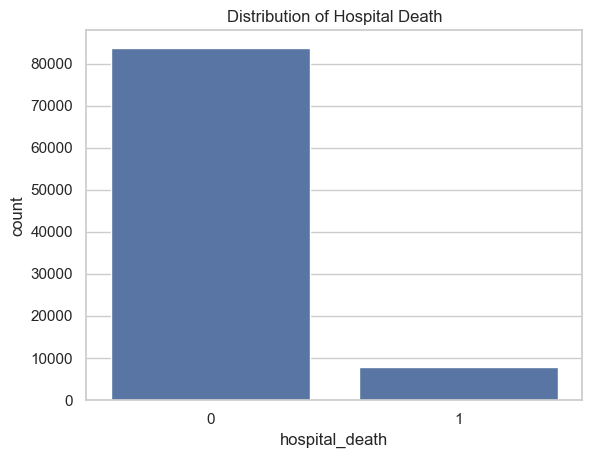

In [10]:
sns.countplot(x='hospital_death', data=df)
plt.title('Distribution of Hospital Death') 
plt.show()

2.3 Missing Values

In [11]:
missing_values = df.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values[missing_values > 0])


Missing Values per Column:
age                            4228
bmi                            3429
ethnicity                      1395
gender                           25
height                         1334
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 74, dtype: int64


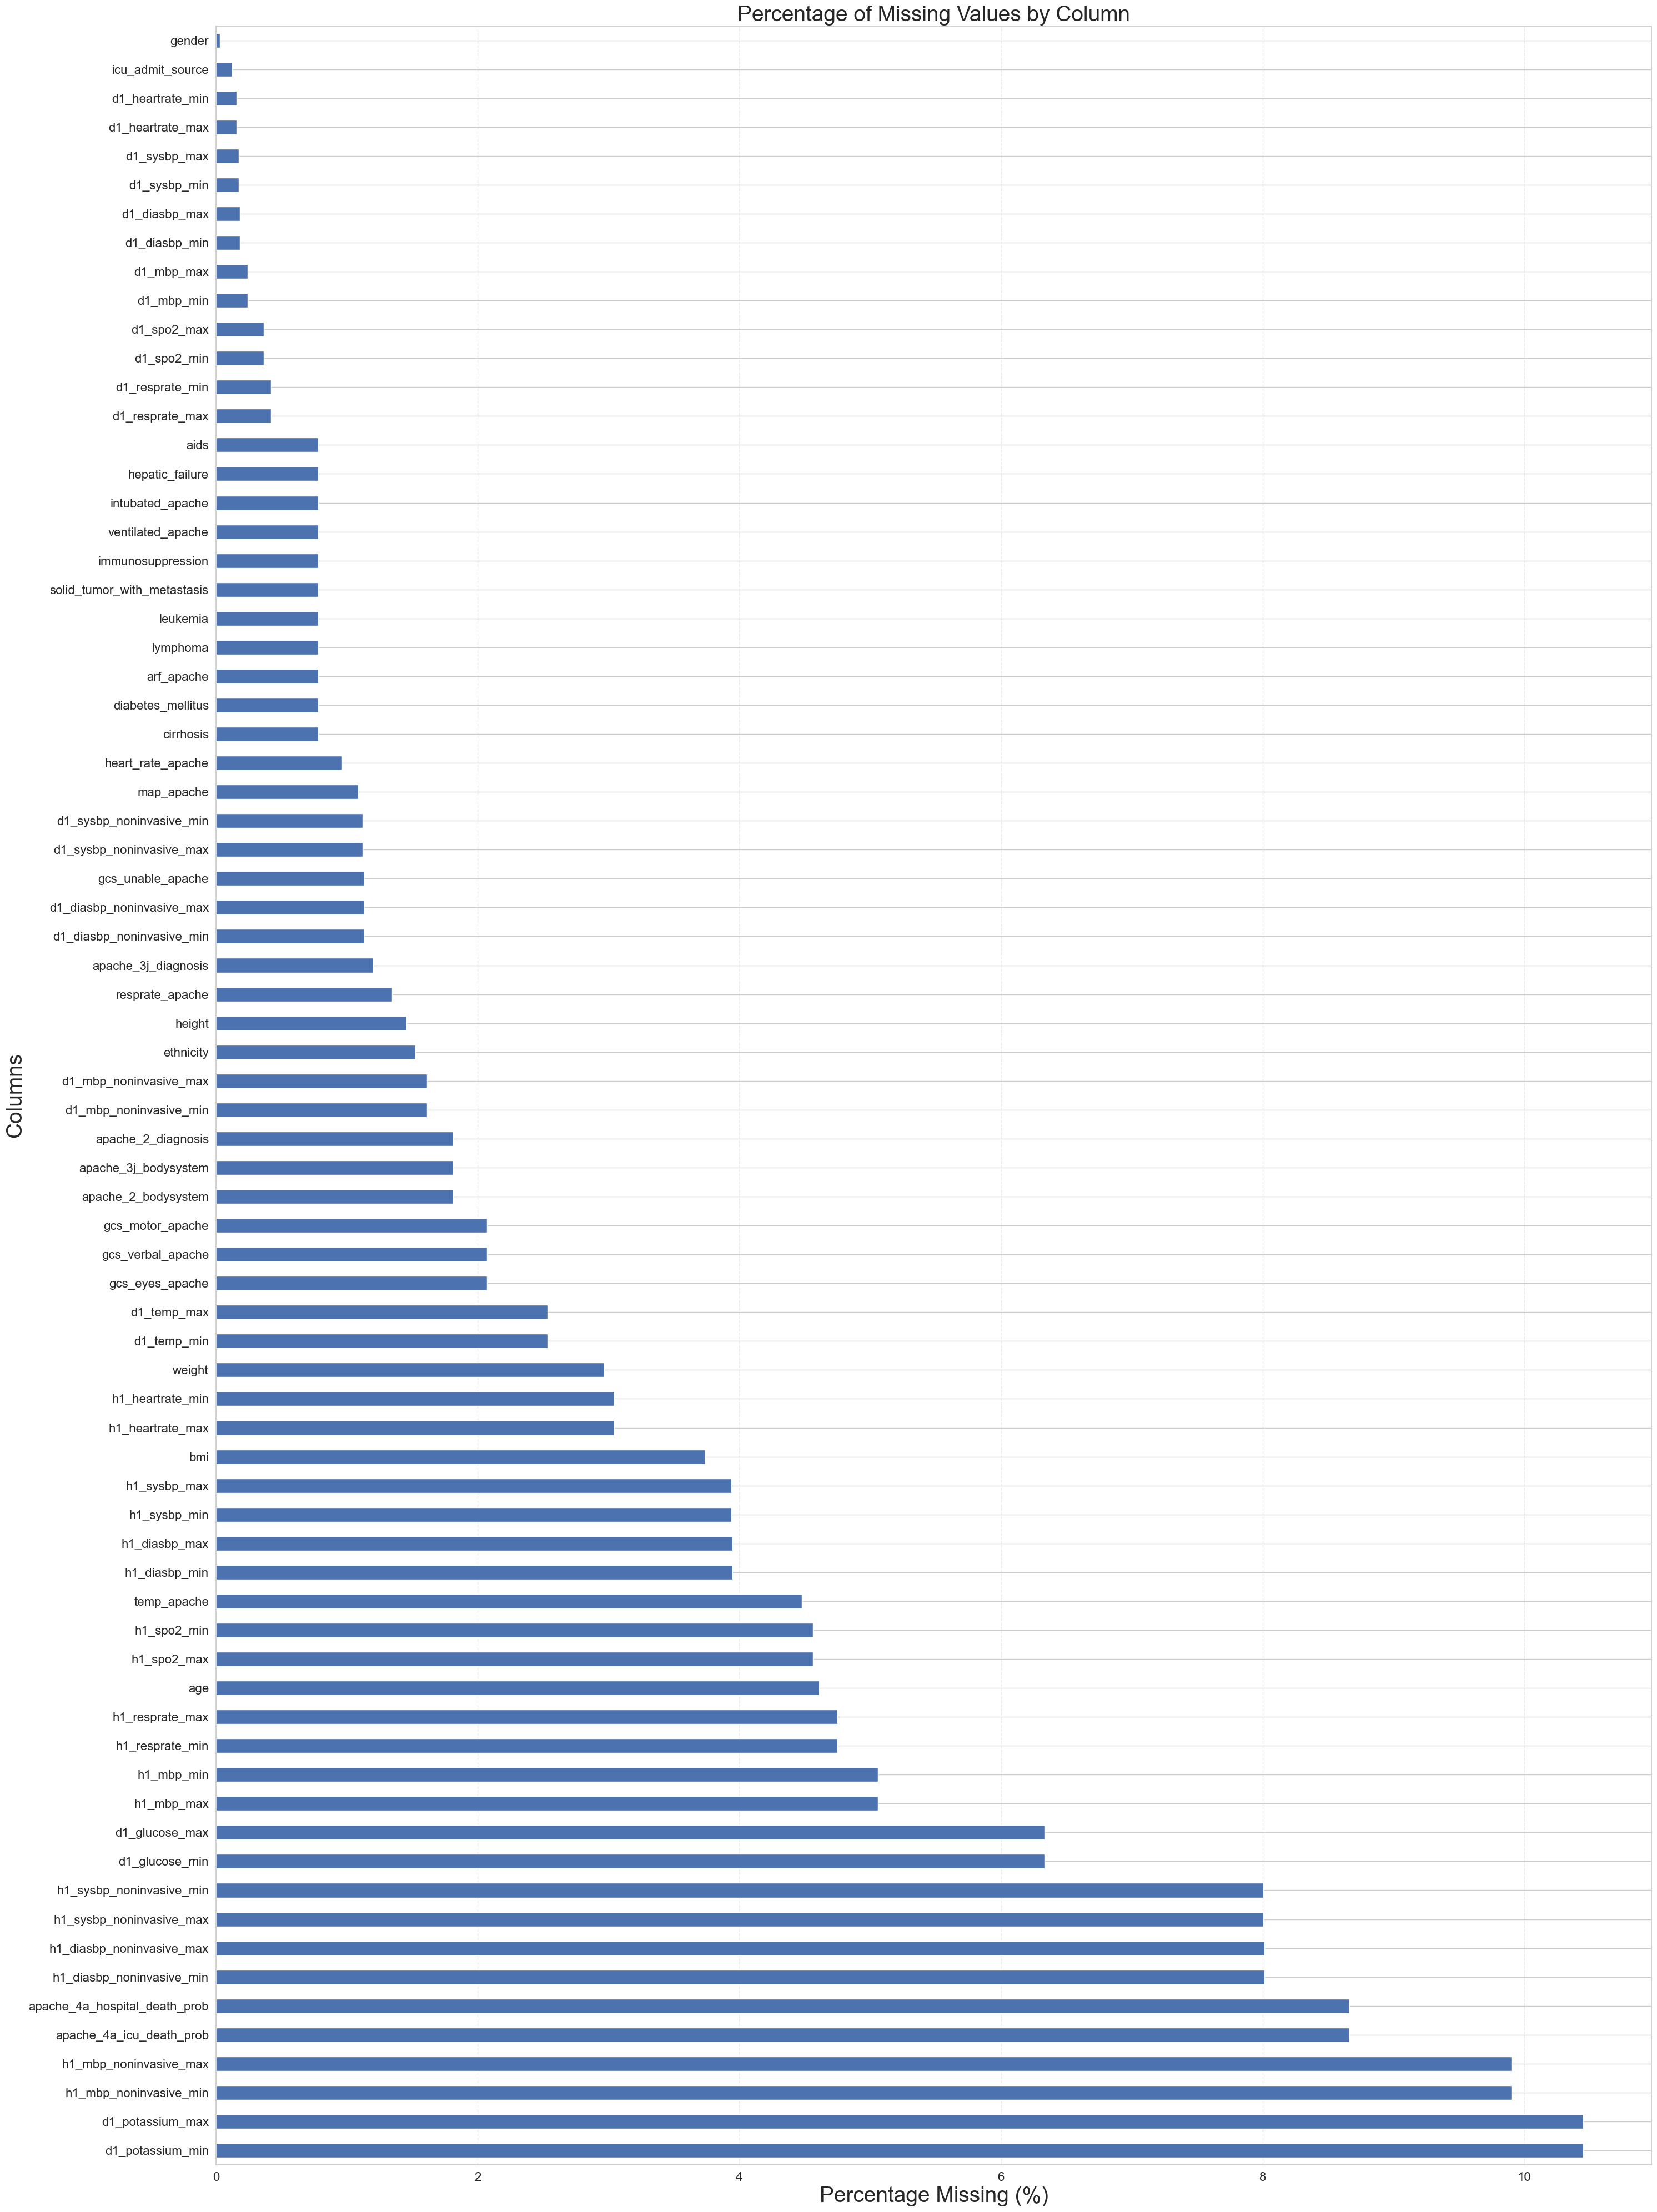

In [12]:
# Missing values percentage bar plot
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_percent = missing_percent[missing_percent > 0]

plt.figure(figsize=(30, 40))
missing_percent.plot(kind='barh', fontsize=16)
plt.title('Percentage of Missing Values by Column', fontsize=28)
plt.xlabel('Percentage Missing (%)', fontsize=28)
plt.ylabel('Columns', fontsize=28)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Fixed the boxplot graph by dropping ids that doesn't empact the prediction and using built it function instead of calculating IQR

2.4 Outlier Detection

In [13]:
df["hospital_id"].unique() # it shows few hospitals so it might be a factor in survivability
df

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,92,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,927,admit,Cardiac ICU,0.298611,72

In [14]:
df_clean = df.drop(columns=["hospital_id","icu_id", "patient_id"]) # very very large variance and doesn't effect the predection so it will be dropped for easier diagrams

In [15]:
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

In [16]:
df_clean = df[numeric_cols].dropna()

In [17]:
outlier_counts = {}

In [18]:
# spliting data to large and small values so the graphs doesn't feel clunky
tiny_values = [col for col in df[numeric_cols].columns if df[col].max() <= 50]
small_values = [col for col in df[numeric_cols].columns if df[col].max() > 50 and df[col].max() < 500 ]
large_values = [col for col in df[numeric_cols].columns if df[col].max() > 500]

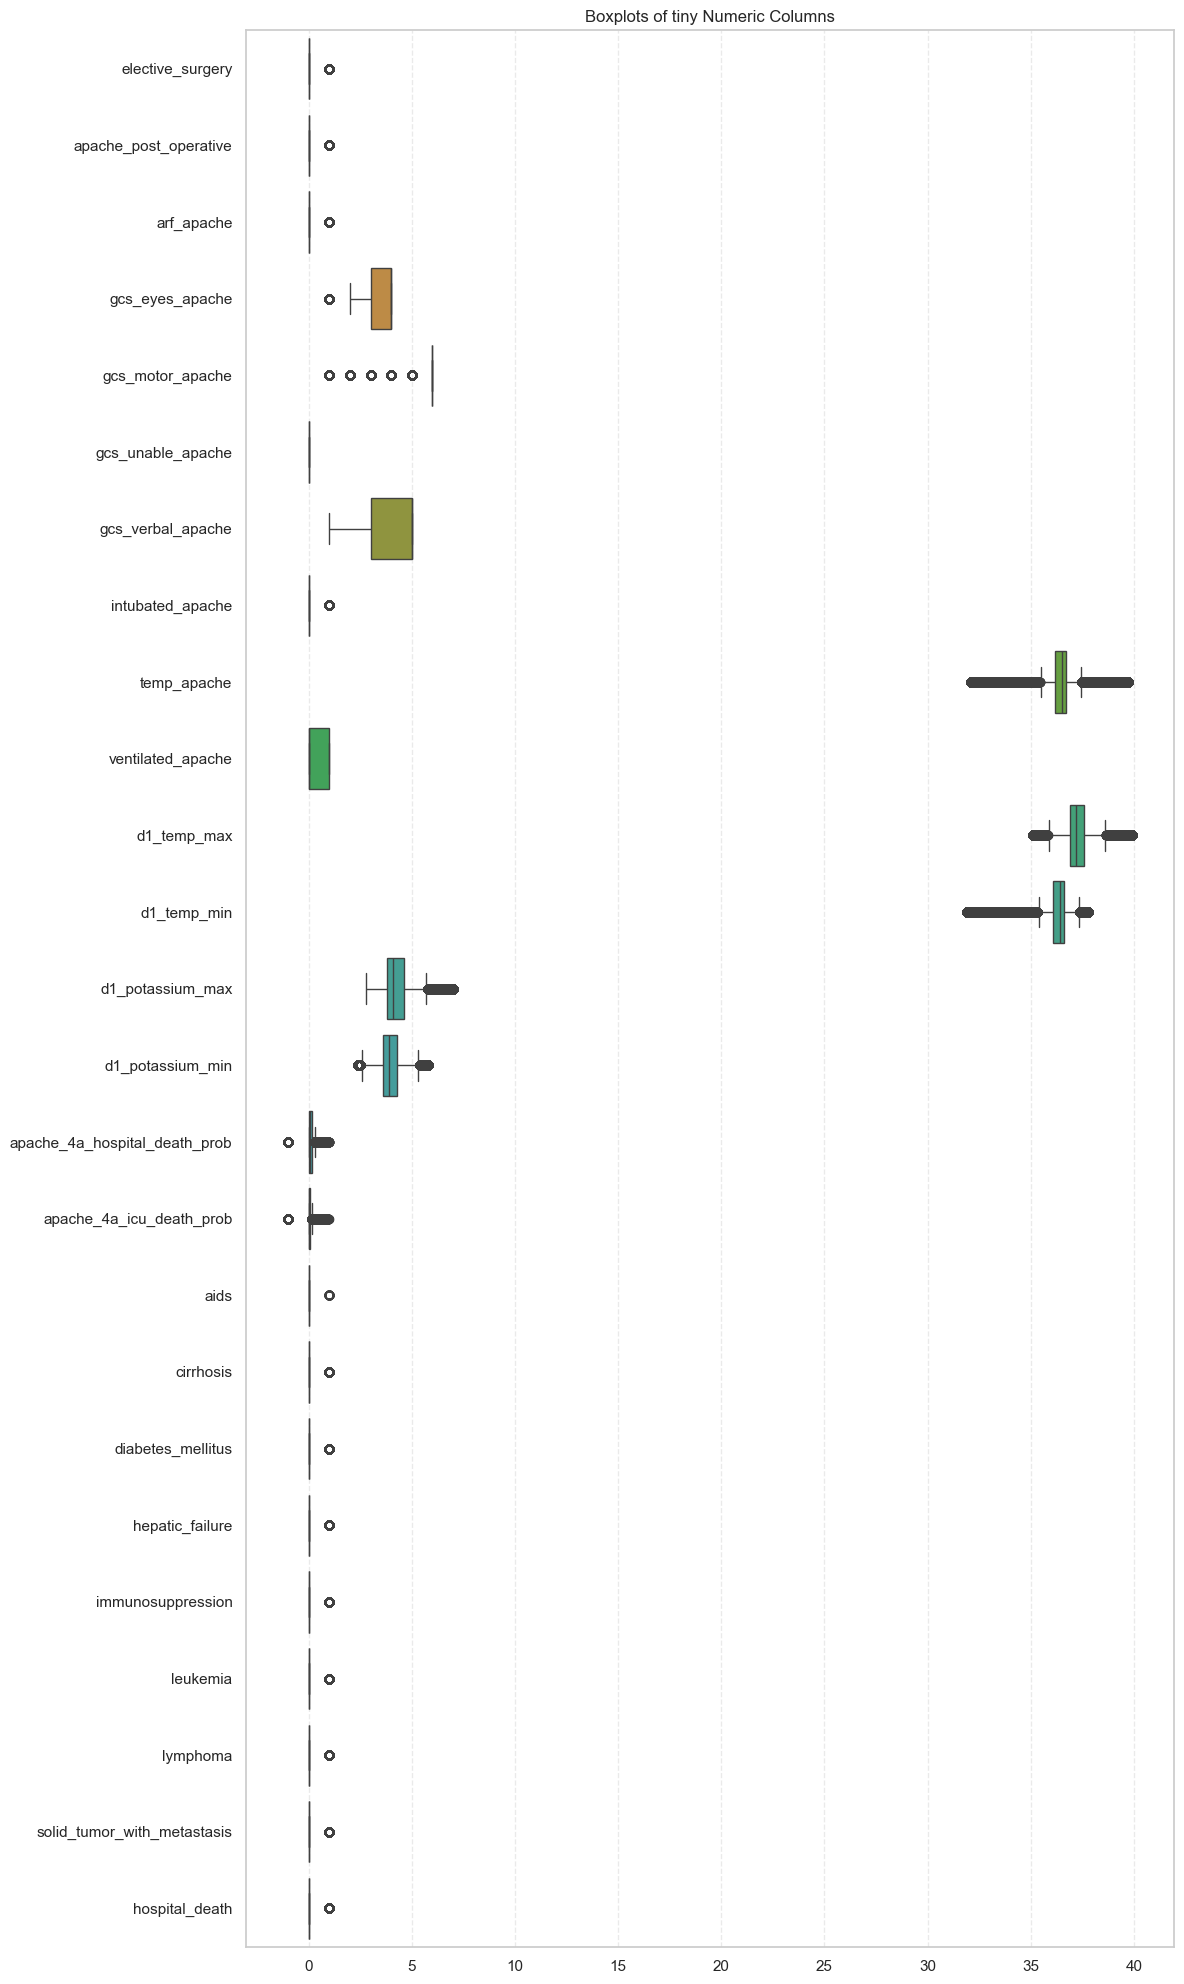

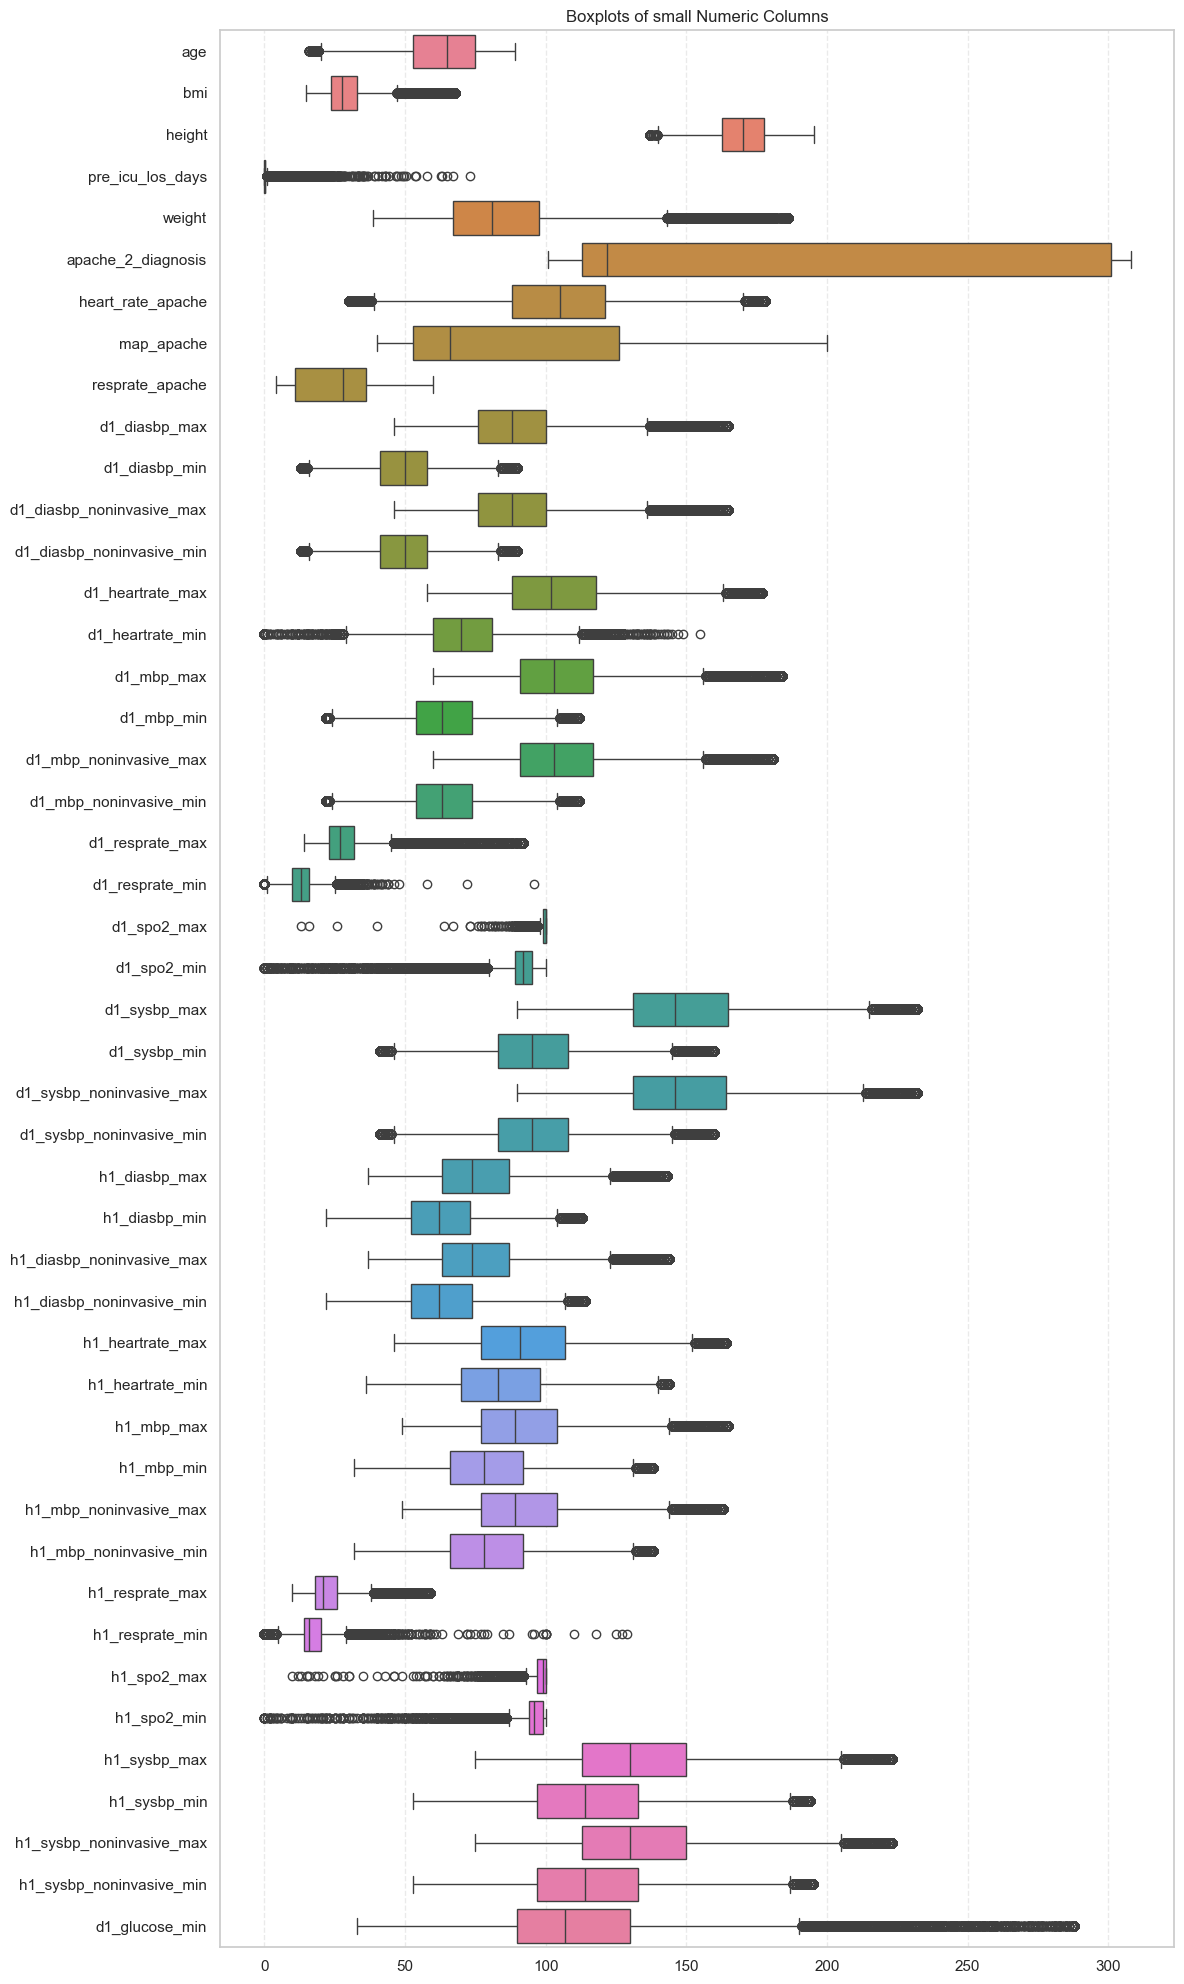

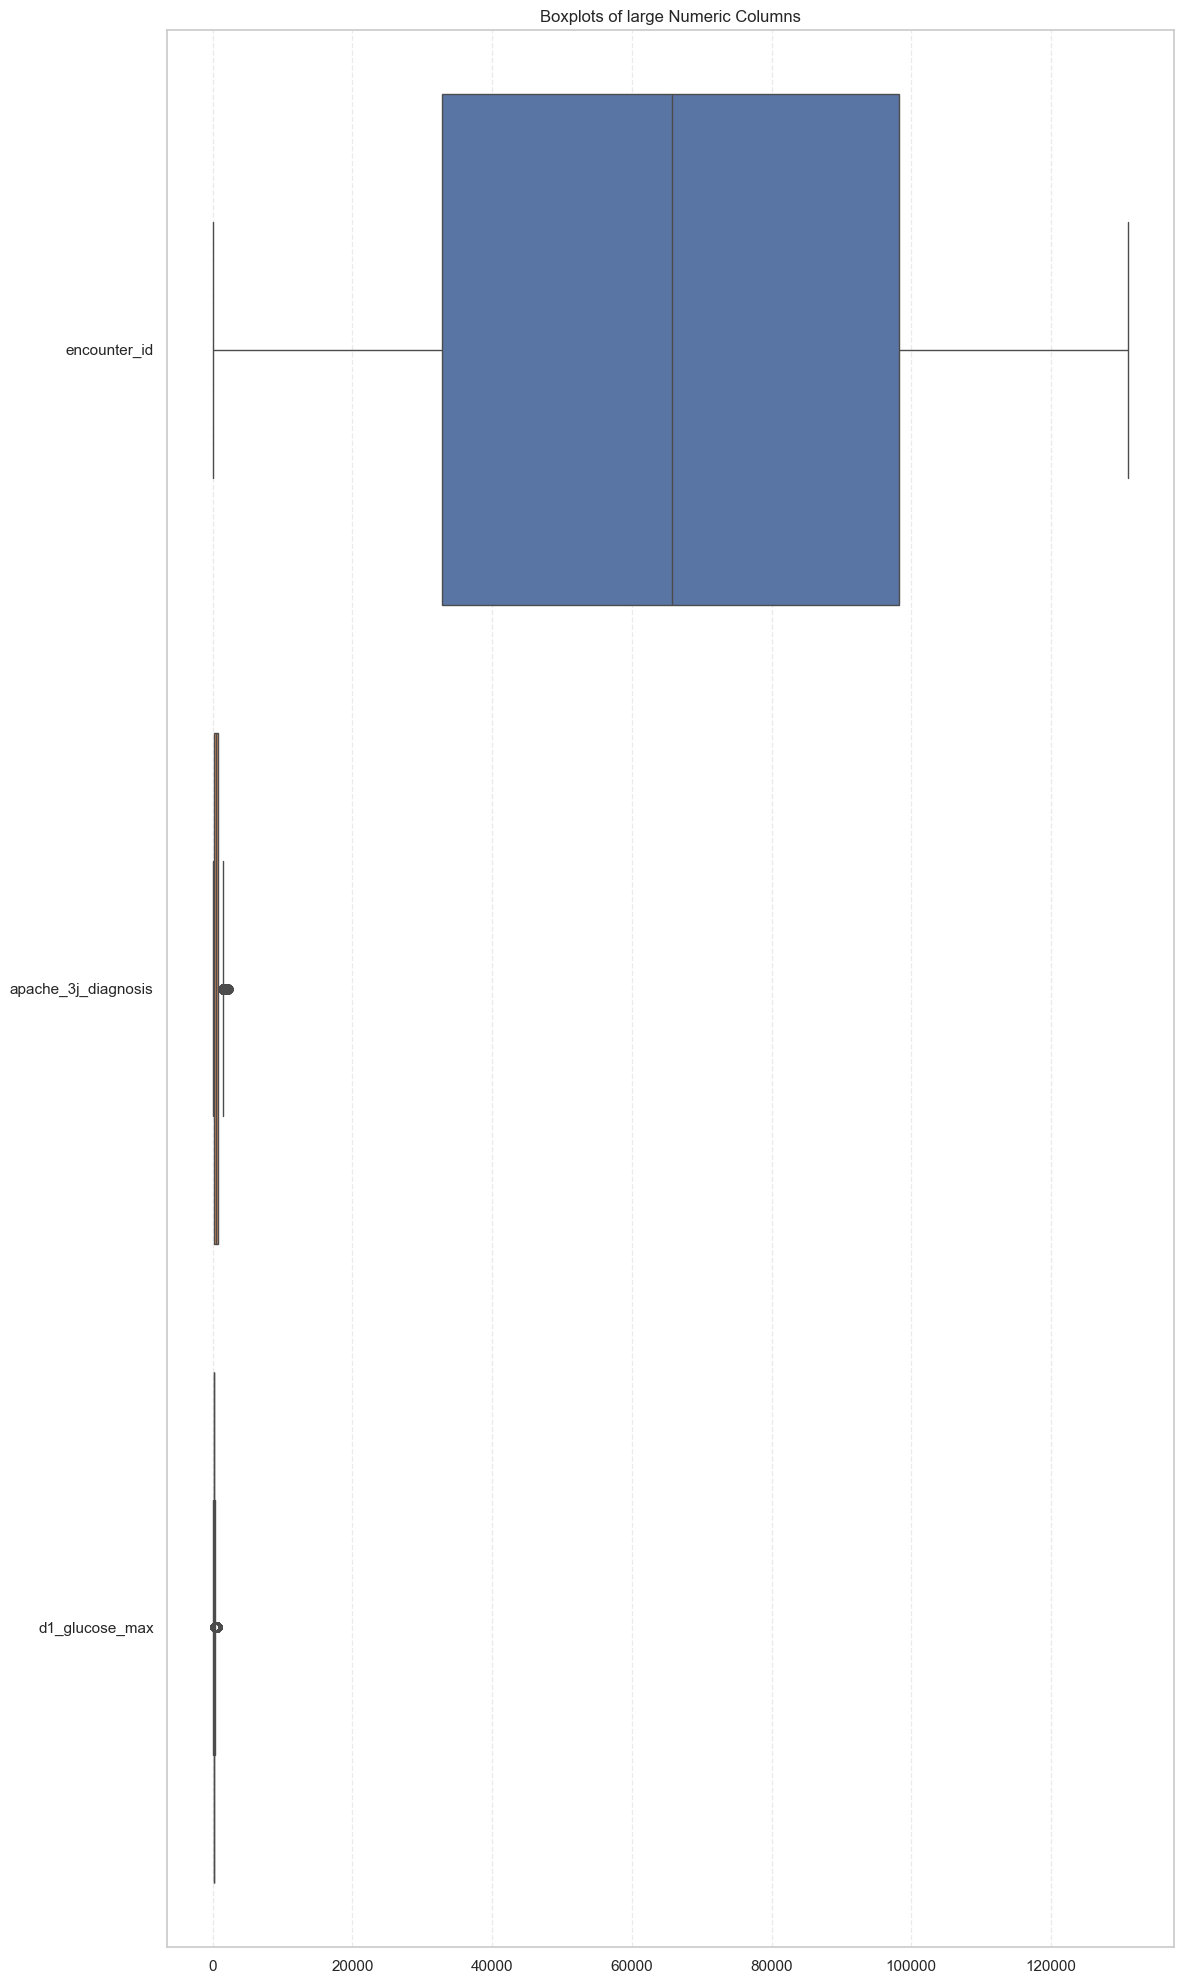

In [19]:
plt.figure(figsize=(12, 20))
sns.boxplot(data=df_clean[tiny_values], orient='h')
plt.title('Boxplots of tiny Numeric Columns')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 20))
sns.boxplot(data=df_clean[small_values], orient='h')
plt.title('Boxplots of small Numeric Columns')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 20))
sns.boxplot(data=df_clean[large_values], orient='h')
plt.title('Boxplots of large Numeric Columns')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


2.5 Important Features

In [20]:
numeric_features = ['age', 'bmi', 'height']
categorical_features = [
    'gender', 'ethnicity', 'elective_surgery', 'icu_admit_source',
    'apache_2_bodysystem', 'apache_3j_bodysystem',
    'diabetes_mellitus', 'hepatic_failure', 'immunosuppression',
    'leukemia', 'lymphoma', 'solid_tumor_with_metastasis'
]

In [21]:
important_features = numeric_features + categorical_features

In [22]:
df = df[important_features + ['hospital_death']] # Filter dataset

In [23]:
df.dropna(subset=numeric_features, inplace=True) # Drop rows with missing values in key numeric features

2.6 Numeric Feature Analysis

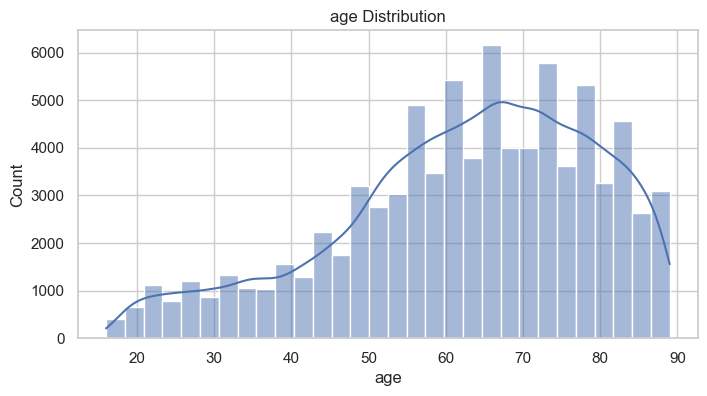

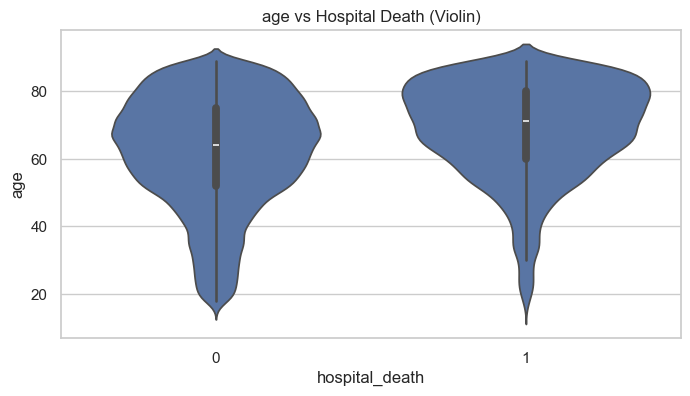

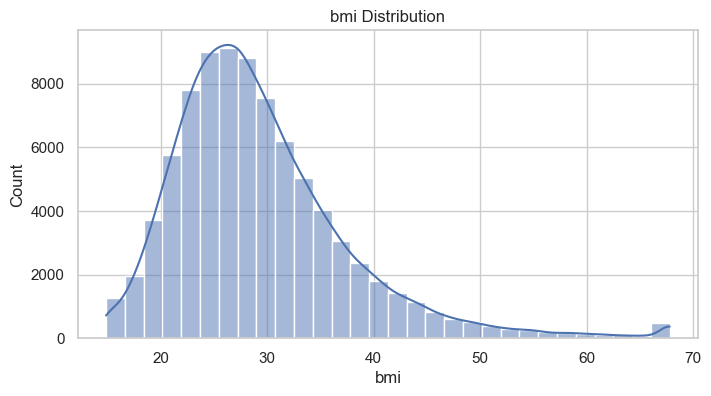

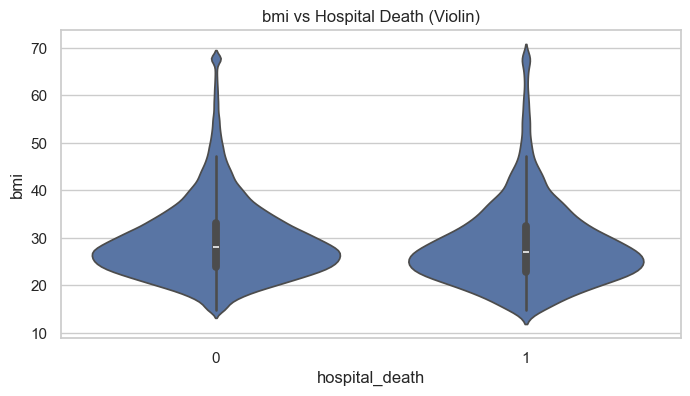

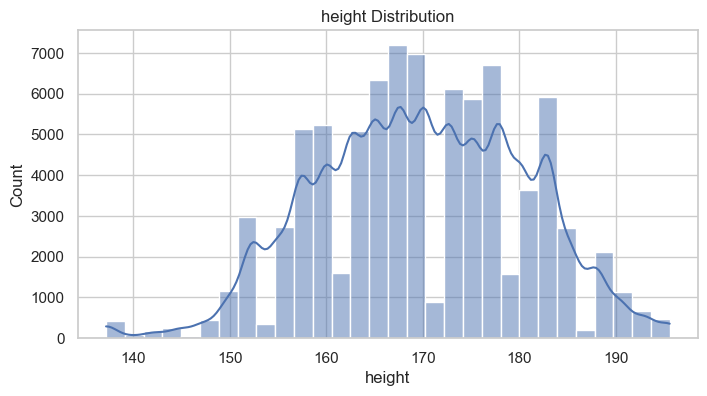

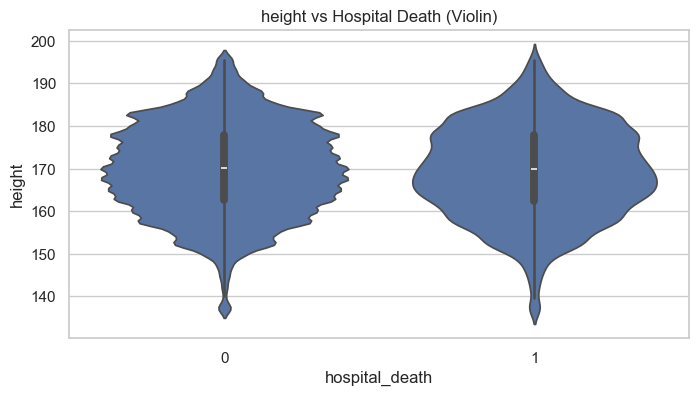

In [24]:
for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.violinplot(x='hospital_death', y=col, data=df)  
    plt.title(f'{col} vs Hospital Death (Violin)')
    plt.show()

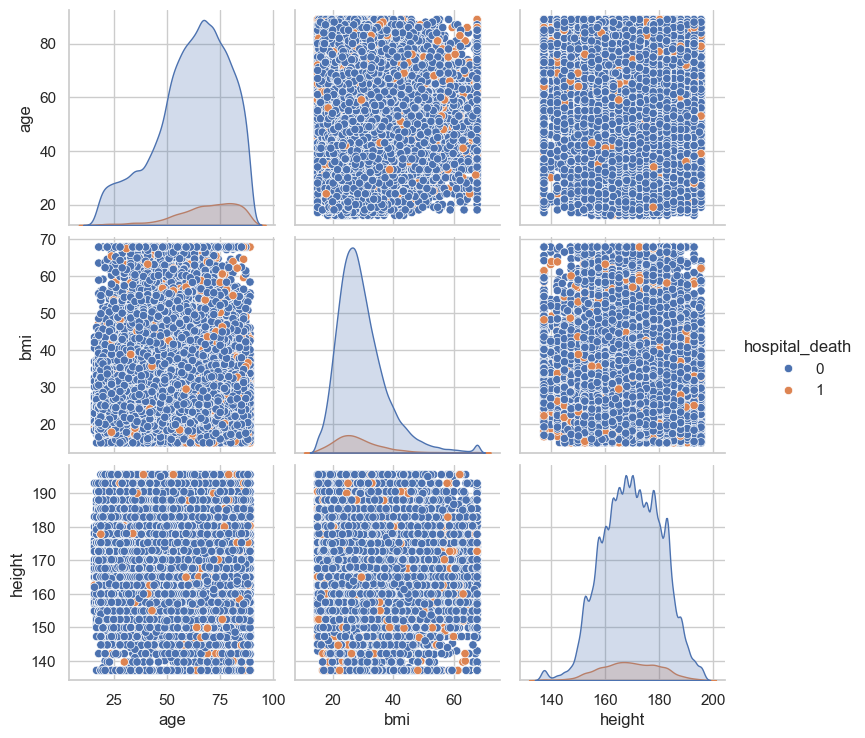

<Figure size 800x400 with 0 Axes>

In [25]:
sns.pairplot(df[numeric_features + ['hospital_death']], hue='hospital_death', diag_kind='kde')
plt.figure(figsize=(8, 4))
plt.suptitle("Pairplot of Numeric Features vs Hospital Death", y=1.02)
plt.show()

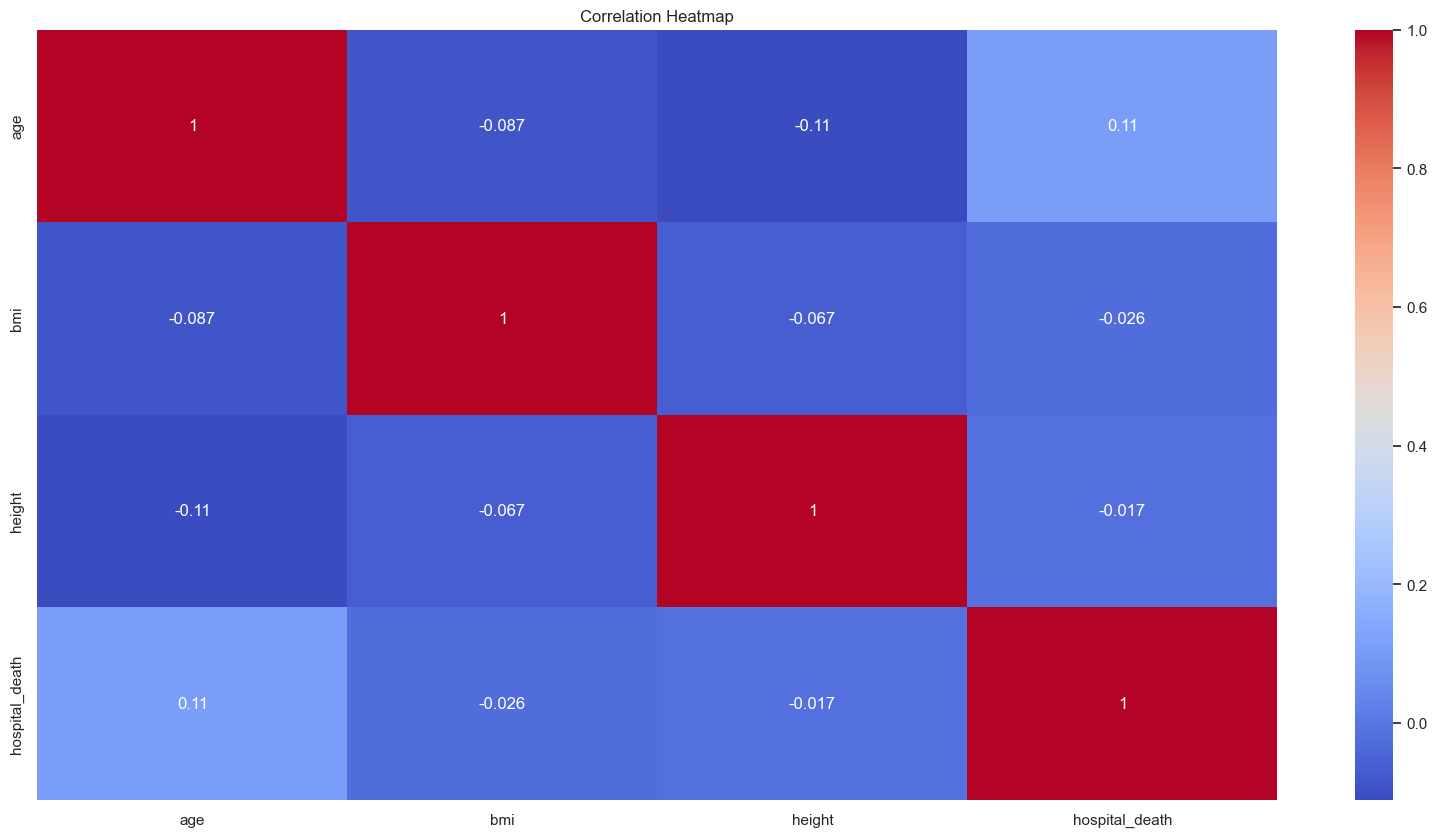

In [26]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[numeric_features + ['hospital_death']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

2.7 Categorical Feature Analysis


Crosstab analysis for gender vs Hospital Death:
hospital_death          0         1
gender                             
F               91.604390  8.395610
M               91.884481  8.115519


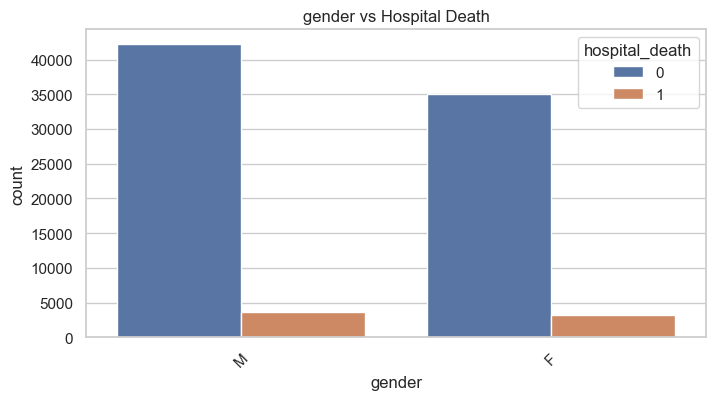


Crosstab analysis for ethnicity vs Hospital Death:
hospital_death            0         1
ethnicity                            
African American  92.543469  7.456531
Asian             91.981132  8.018868
Caucasian         91.657139  8.342861
Hispanic          90.495868  9.504132
Native American   91.102258  8.897742
Other/Unknown     92.333574  7.666426


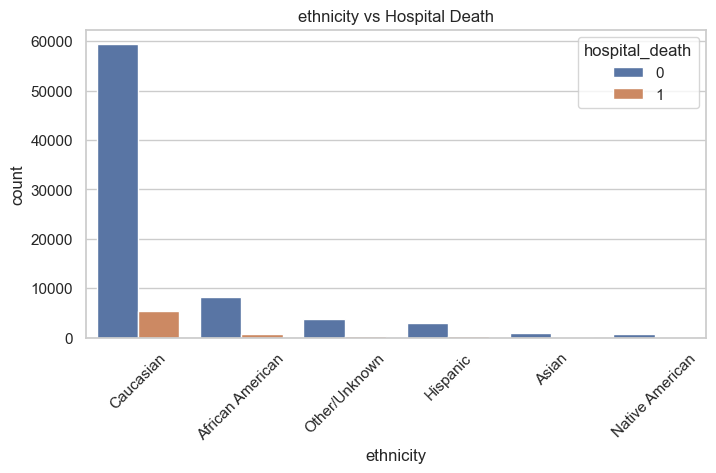


Crosstab analysis for elective_surgery vs Hospital Death:
hospital_death            0         1
elective_surgery                     
0                 90.535160  9.464840
1                 97.008735  2.991265


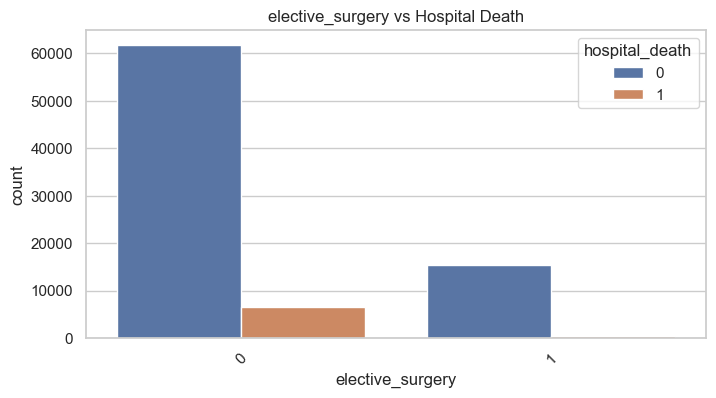


Crosstab analysis for icu_admit_source vs Hospital Death:
hospital_death                     0          1
icu_admit_source                               
Accident & Emergency       91.750617   8.249383
Floor                      86.972003  13.027997
Operating Room / Recovery  96.383559   3.616441
Other Hospital             87.035358  12.964642
Other ICU                  87.835420  12.164580


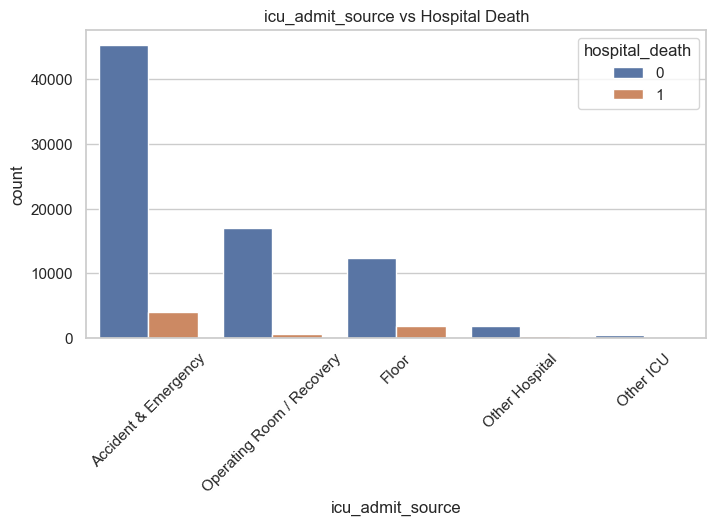


Crosstab analysis for apache_2_bodysystem vs Hospital Death:
hospital_death               0          1
apache_2_bodysystem                      
Cardiovascular       89.591671  10.408329
Gastrointestinal     92.868386   7.131614
Haematologic         90.740741   9.259259
Metabolic            98.469599   1.530401
Neurologic           92.402875   7.597125
Renal/Genitourinary  94.736842   5.263158
Respiratory          89.135235  10.864765
Trauma               93.849724   6.150276
Undefined Diagnoses  94.984326   5.015674
Undefined diagnoses  98.197449   1.802551


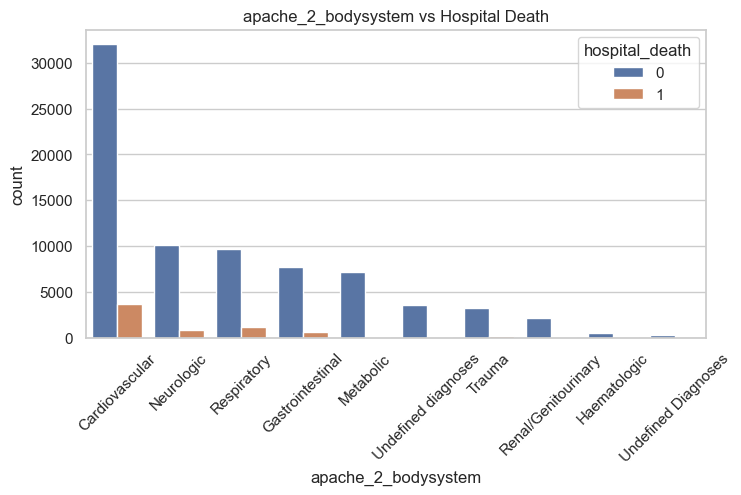


Crosstab analysis for apache_3j_bodysystem vs Hospital Death:
hospital_death                0          1
apache_3j_bodysystem                      
Cardiovascular        92.404699   7.595301
Gastrointestinal      92.868386   7.131614
Genitourinary         94.120553   5.879447
Gynecological         99.331104   0.668896
Hematological         90.740741   9.259259
Metabolic             98.469599   1.530401
Musculoskeletal/Skin  95.774648   4.225352
Neurological          92.402875   7.597125
Respiratory           89.135235  10.864765
Sepsis                84.712130  15.287870
Trauma                93.849724   6.150276


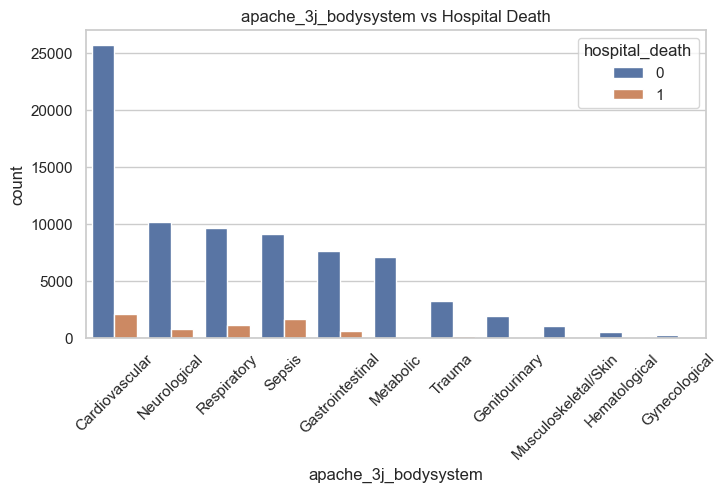


Crosstab analysis for diabetes_mellitus vs Hospital Death:
hospital_death             0         1
diabetes_mellitus                     
0.0                91.559161  8.440839
1.0                92.429038  7.570962


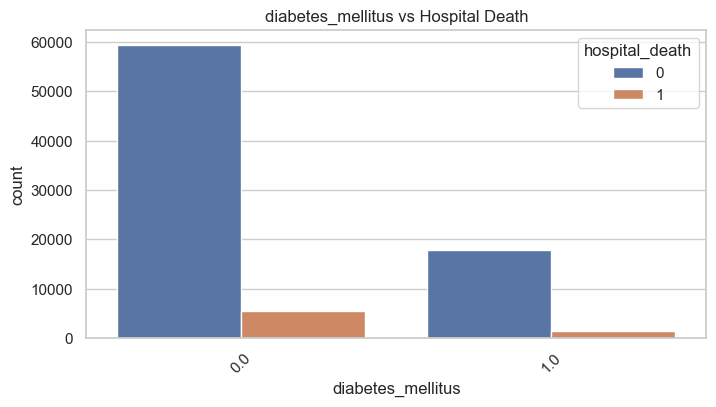


Crosstab analysis for hepatic_failure vs Hospital Death:
hospital_death           0          1
hepatic_failure                      
0.0              91.894722   8.105278
1.0              81.762115  18.237885


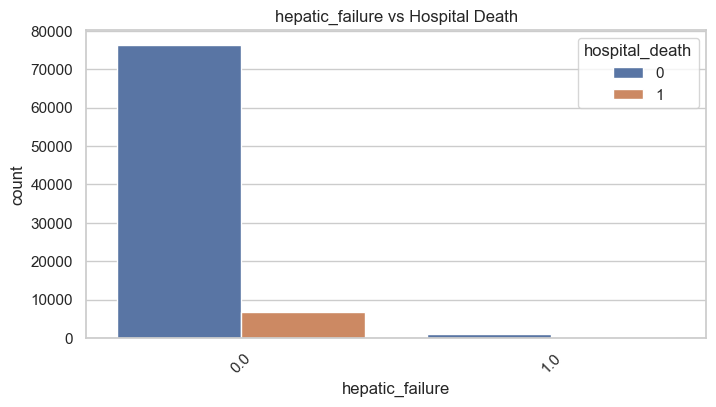


Crosstab analysis for immunosuppression vs Hospital Death:
hospital_death             0          1
immunosuppression                      
0.0                91.973991   8.026009
1.0                83.923826  16.076174


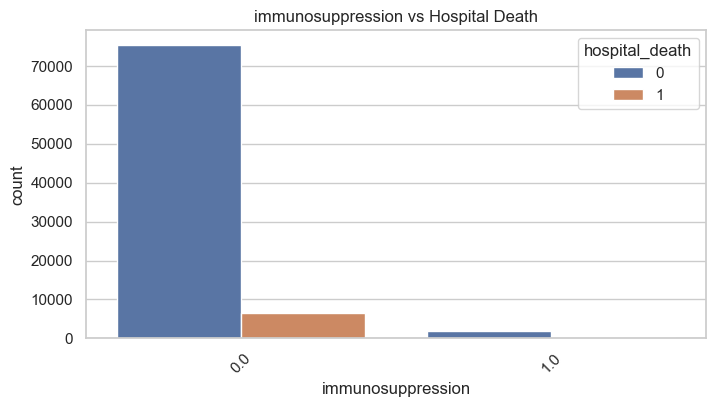


Crosstab analysis for leukemia vs Hospital Death:
hospital_death          0          1
leukemia                            
0.0             91.832781   8.167219
1.0             81.395349  18.604651


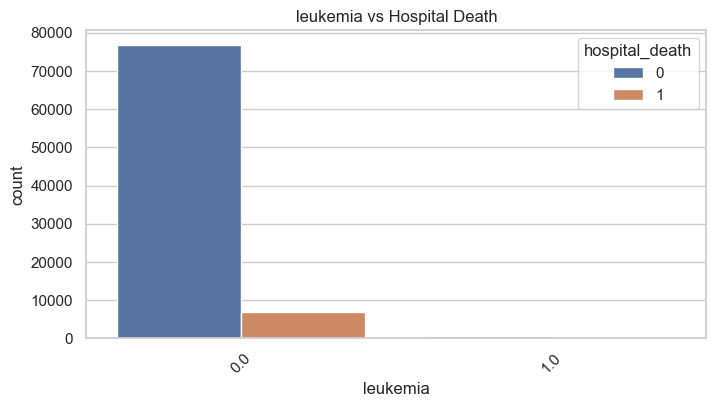


Crosstab analysis for lymphoma vs Hospital Death:
hospital_death          0          1
lymphoma                            
0.0             91.794542   8.205458
1.0             83.240223  16.759777


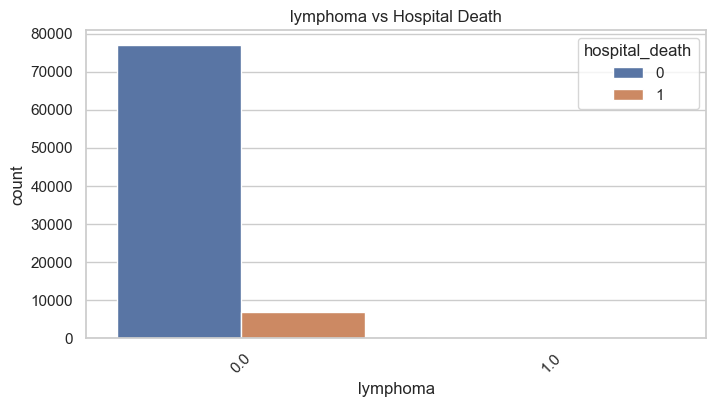


Crosstab analysis for solid_tumor_with_metastasis vs Hospital Death:
hospital_death                       0          1
solid_tumor_with_metastasis                      
0.0                          91.974822   8.025178
1.0                          81.700450  18.299550


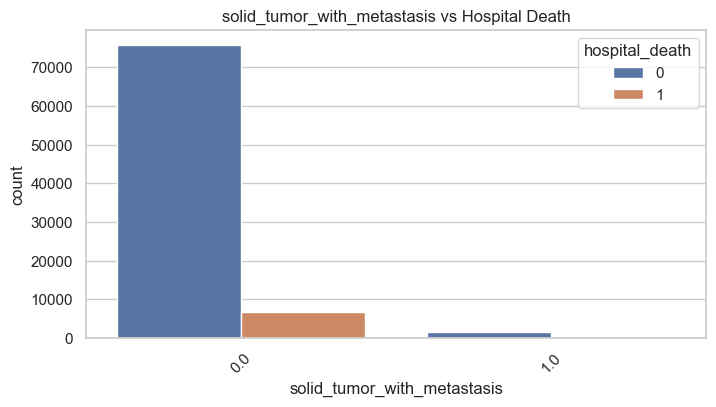

In [27]:
for col in categorical_features:
    # 1. Crosstab analysis between categorical feature and hospital_death
    crosstab_result = pd.crosstab(df[col], df['hospital_death'], normalize='index') * 100
    print(f"\nCrosstab analysis for {col} vs Hospital Death:")
    print(crosstab_result)

    # 2. Countplot with hospital_death hue to visualize its relationship with the categorical feature
    plt.figure(figsize=(8, 4))
    x= df["hospital_death"].astype(str)
    sns.countplot(x=col, hue=x, data=df, order=df[col].value_counts().index)
    plt.title(f'{col} vs Hospital Death')
    plt.xticks(rotation=45)
    plt.show()

In [28]:
#DIMENSIONALITY REDUCTION (LDA

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

x = df_clean.iloc[:, :-1]
y = df_clean.iloc[:, -1]   
encoded = LabelEncoder()
y_encoded = encoded.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

lda = LDA(n_components=1)
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)

print("Original feature shape:", x_train.shape)
print("Reduced feature shape after LDA:", x_train_lda.shape)

Original feature shape: (46078, 73)
Reduced feature shape after LDA: (46078, 1)


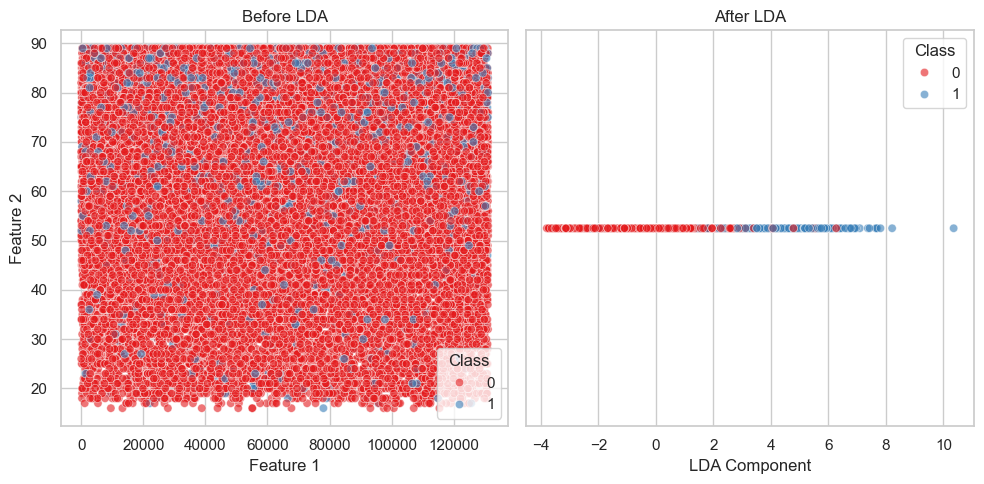

In [31]:
# for 2 features

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=x_train.iloc[:, 0], y=x_train.iloc[:, 1], hue=y_train, palette='Set1', alpha=0.6)
plt.title("Before LDA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Class", loc='best')

plt.subplot(1, 2, 2)
sns.scatterplot(x=x_train_lda[:, 0], y=[0]*len(x_train_lda), hue=y_train, palette='Set1', alpha=0.6)
plt.title("After LDA")
plt.xlabel("LDA Component")
plt.yticks([])  
plt.legend(title="Class", loc='best')

plt.tight_layout()
plt.show()

### Support Vector Machine Classification

Model setup

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


svm_model = SVC(random_state=42)

model training

In [33]:
# training our SVM model using the LDA-transformed features
svm_model.fit(x_train_lda, y_train)

SVC(random_state=42)

Hyperparameter Tuning

In [34]:
# we use GridSearchCV to find the best model parameters for optimization
param_grid = {
    'C': [0.1, 1],  
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale'], 
}

grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', verbose =1, n_jobs = -1)

grid_search.fit(x_train_lda, y_train)


print(f"Best parameters: {grid_search.best_params_}")

best_svm_model = grid_search.best_estimator_

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


model evaluation


In [35]:
y_pred = best_svm_model.predict(x_test_lda)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}") #accuracy
print("\nClassification Report:")
print(classification_report(y_test, y_pred)) # precision, recall, f1-score
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9196180555555555

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10506
           1       0.64      0.20      0.30      1014

    accuracy                           0.92     11520
   macro avg       0.78      0.59      0.63     11520
weighted avg       0.90      0.92      0.90     11520


Confusion Matrix:
[[10392   114]
 [  812   202]]


visualizing results

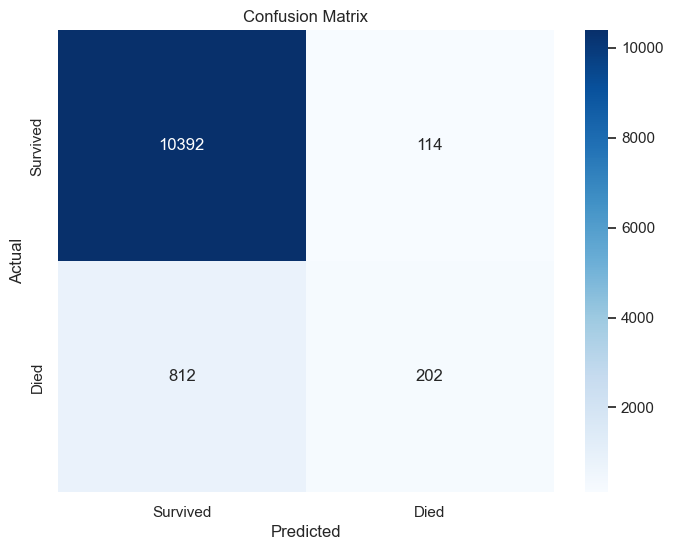

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Survived', 'Died'], yticklabels=['Survived', 'Died'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(x, y)


In [ ]:
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': mi})
new_row = pd.DataFrame([{"Feature": "hospital_death", "Importance": 1}])

importance_df = importance_df.concat([importance_df, new_row], ignore_index=True)
importance_df.sort_values('Importance', ascending=False)[:20].to_csv('important_features.csv')

NameError: name 'value1' is not defined